In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/pranavkalikate/Desktop/ALGO/fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
X=df.drop('label', axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df=df.dropna()
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
df.shape

(18285, 5)

In [10]:
X=df.drop('label', axis=1)
X.shape

(18285, 4)

In [11]:
y=df['label']
y.shape

(18285,)

In [12]:
messages=df.copy()
messages.reset_index(inplace=True)
#reset - after removing null values index will be changed

In [13]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
print(messages['title'][1])
print(messages['title'][6])

FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times


In [15]:
len(messages)

18285

Text preprocessing

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [18]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3)) #combination of 1,2 and 3 words
X = cv.fit_transform(corpus).toarray()

In [19]:
X.shape

(18285, 5000)

In [20]:
y=messages['label']

In [21]:
y.shape

(18285,)

In [22]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [23]:
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (12250, 5000)
X_test shape is  (6035, 5000)
y_train shape is  (12250,)
y_test shape is  (6035,)


In [24]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [27]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial_Naive_Bayes Algorithm

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

In [31]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
pred = classifier.predict(X_test)

In [33]:
score = metrics.accuracy_score(y_test, pred)

In [34]:
print('score is :',score)

score is : 0.9019055509527755


In [35]:
print("accuracy:   %0.3f" % score)

accuracy:   0.902


In [36]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)

In [37]:
cm

array([[3049,  342],
       [ 250, 2394]])

Confusion matrix, without normalization


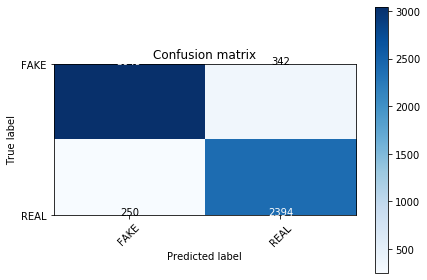

In [38]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [39]:
accuracy=(2987+2987)/(2987+2987+357+264)
accuracy

0.9058377558756634

In [40]:
# Applying k-Fold Cross Validation (model evaluation)  
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('mean acc is: ',accuracies.mean())
print('std is: ',accuracies.std())

mean acc is:  0.8958367346938776
std is:  0.007694283538251884


In [41]:
## Get Features names
feature_names = cv.get_feature_names()

In [42]:
classifier.coef_[0]

array([ -9.5958295 ,  -9.08500388, -10.00129461, ..., -10.69444179,
        -8.61500025,  -9.30814743])

In [43]:
# Most real features : less negative values
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.002358050592357, 'trump'),
 (-4.30756247373634, 'hillari'),
 (-4.404726222189987, 'clinton'),
 (-4.961100516201239, 'elect'),
 (-5.149264348619423, 'new'),
 (-5.287270021638866, 'video'),
 (-5.300814246746623, 'us'),
 (-5.300814246746623, 'comment'),
 (-5.352107541134174, 'war'),
 (-5.457999830269036, 'hillari clinton'),
 (-5.474085968020661, 'fbi'),
 (-5.523957798060834, 'vote'),
 (-5.535386493884456, 'email'),
 (-5.582454004742441, 'world'),
 (-5.600691592292223, 'obama'),
 (-5.677161956284061, 'donald'),
 (-5.717708050678411, 'donald trump'),
 (-5.781786907362933, 'russia'),
 (-5.850254706640394, 'america'),
 (-5.932267858301229, 'day')]

In [44]:
# Most fake features : high negative values
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.694441793098985, 'abroad'),
 (-10.694441793098985, 'abus new'),
 (-10.694441793098985, 'abus new york'),
 (-10.694441793098985, 'academi'),
 (-10.694441793098985, 'act new'),
 (-10.694441793098985, 'act new york'),
 (-10.694441793098985, 'advic'),
 (-10.694441793098985, 'advis new'),
 (-10.694441793098985, 'advis new york'),
 (-10.694441793098985, 'age new'),
 (-10.694441793098985, 'age new york'),
 (-10.694441793098985, 'agenda breitbart'),
 (-10.694441793098985, 'airlin'),
 (-10.694441793098985, 'aleppo new'),
 (-10.694441793098985, 'aleppo new york'),
 (-10.694441793098985, 'ali'),
 (-10.694441793098985, 'allegedli'),
 (-10.694441793098985, 'america breitbart'),
 (-10.694441793098985, 'america new'),
 (-10.694441793098985, 'america new york')]

In [45]:
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/Users/pranavkalikate/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8898094449047225
Alpha: 0.1, Score : 0.9009113504556753
Alpha: 0.2, Score : 0.9009113504556753
Alpha: 0.30000000000000004, Score : 0.9010770505385253
Alpha: 0.4, Score : 0.9012427506213753
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9009113504556753
Alpha: 0.7000000000000001, Score : 0.9014084507042254
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255
